Olá! Obrigado por abrir meu Kernel. Estou super animado para compartilhar meu primeiro Kernel com a comunidade Kaggle. Por favor, certifique-se de fazer upvote, bifurcar e comentar. Obrigado, e você pode ter sorte "estatisticamente significativa"!


1. Introdução
2. Carregando bibliotecas e recuperando dados
3. Entendendo os dados
4. Valores em falta
5. Visualização de Dados
1. Introdução
fundo

As artes marciais mistas (MMA) são um esporte de combate de contato total que permite golpear e agarrar, tanto em pé quanto no chão, usando técnicas de outros esportes de combate e artes marciais. O Ultimate Fighting Championship (UFC) é uma organização americana de artes marciais mistas sediada em Las Vegas, Nevada e é a maior promoção de MMA do mundo e conta com os melhores lutadores do esporte. Com sede nos Estados Unidos, o UFC produz eventos em todo o mundo que exibem doze divisões de peso e seguem as Regras Unificadas de Artes Marciais Mistas. Este é um esporte altamente imprevisível

Poucas coisas vamos tentar visualizar:

Como está a idade / altura relacionada com o resultado?
Locais mais populares em UFC?
Maneira mais popular de vencer a luta?
Comparando técnicas usadas por lutadores

2. Carregando bibliotecas e recuperando dados
Nem todos os recursos python são carregados no seu ambiente de trabalho por padrão. Nós precisaríamos importar todas as bibliotecas que vamos usar. Nós escolheremos nomes de alias para nossos módulos por conveniência (por exemplo, numpy -> np, pandas -> pd)

In [50]:
#!pip install plotly 

In [51]:
#!python -m pip install --upgrade pip

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected = True)
cf.go_offline()
%matplotlib inline

from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as offline
# Squarify for treemaps
import squarify
Random for well, random stuff
import random
# operator for sorting dictionaries
import operator
# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')



df = pd.read_csv("data.csv")
df.head(2)

SyntaxError: invalid syntax (<ipython-input-53-83992dfb98e8>, line 23)


3. Entendendo os dados

O conjunto de dados contém uma lista de todas as lutas do UFC desde 2013, com entradas resumidas da rodada de cada lutador por registro de rodada precedendo aquela luta. Criado na tentativa de prever um vencedor da luta do UFC. Cada linha representa uma única luta - com os registros anteriores de cada lutador somados antes da luta. Estatísticas em branco significam a primeira luta do lutador desde 2013, que é onde os dados granulares para as lutas do UFC.

Temos cerca de 895 colunas, algumas colunas importantes para observar:

BPrev: Lutas anteriores pelo lutador 'Blue'
B_Age: Age of 'Blue' fighter
B_Altura: Altura do lutador 'Blue'
B_Weight: Peso do lutador 'Blue'
B_Location: Localização do lutador 'Blue'
B_Hometown: Cidade natal de 'lutador azul
RPrev: Lutas anteriores pelo lutador 'Red'
R_Age: Age of 'Red' fighter
R_Altura: Altura do lutador 'Vermelho'
R_Weight: Peso do lutador 'Red'
R_Location: Localização do lutador 'Red'
R_Hometown: Cidade natal de 'Red lutador
Data: data da luta
winby: Como o lutador venceu a luta (decisão, submissão KO etc.)
vencedor: Quem foi o vencedor da luta?
Além disso, o conjunto de dados contém todas as técnicas (soco, chutes, quedas etc.) tentadas e desembarcadas pelos lutadores em cada rodada.

In [10]:
df.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,1477.000000,1477.000000,1474.000000,1476.000000,1477.000000,1477.000000,978.000000,978.000000,978.000000,978.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1.735274,0.654705,30.954545,177.451220,1964.633040,73.804333,0.036810,0.896728,0.431493,2.986708,...,211.965278,34.062500,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.562500,263.069444
std,1.895561,1.057269,4.020311,8.561541,666.949141,14.980531,0.193748,1.255722,0.830527,3.987291,...,139.412374,68.819742,94.574736,22.374419,12.854023,14.312013,36.429320,142.328509,19.698681,162.386212
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,28.000000,172.000000,1755.000000,65.000000,0.000000,0.000000,0.000000,0.000000,...,110.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,126.750000,0.000000,139.000000
50%,1.000000,0.000000,31.000000,177.000000,2156.000000,70.000000,0.000000,0.000000,0.000000,2.000000,...,214.000000,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,232.000000,0.000000,291.000000
75%,3.000000,1.000000,34.000000,182.000000,2337.000000,84.000000,0.000000,1.000000,1.000000,4.000000,...,294.500000,47.500000,109.000000,0.000000,0.000000,0.000000,2.000000,299.000000,0.000000,300.000000
max,11.000000,7.000000,46.000000,213.000000,2882.000000,120.000000,2.000000,9.000000,6.000000,33.000000,...,647.000000,496.000000,529.000000,144.000000,91.000000,62.000000,264.000000,659.000000,128.000000,841.000000


In [11]:
df.describe(include="all")

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
count,1477.000000,1477.000000,1474.000000,1476.000000,1471,1477.000000,1470,1477,1477.000000,978.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,1461,1477
unique,NaN,NaN,NaN,NaN,568,NaN,431,719,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4
top,NaN,NaN,NaN,NaN,Rio de Janeiro Brazil,NaN,Rio de Janeiro Brazil,Tim Means,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
freq,NaN,NaN,NaN,NaN,32,NaN,38,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720,867
mean,1.735274,0.654705,30.954545,177.451220,NaN,1964.633040,NaN,NaN,73.804333,0.036810,...,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.562500,263.069444,NaN,NaN
std,1.895561,1.057269,4.020311,8.561541,NaN,666.949141,NaN,NaN,14.980531,0.193748,...,94.574736,22.374419,12.854023,14.312013,36.429320,142.328509,19.698681,162.386212,NaN,NaN
min,0.000000,0.000000,20.000000,152.000000,NaN,129.000000,NaN,NaN,52.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,28.000000,172.000000,NaN,1755.000000,NaN,NaN,65.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,126.750000,0.000000,139.000000,NaN,NaN
50%,1.000000,0.000000,31.000000,177.000000,NaN,2156.000000,NaN,NaN,70.000000,0.000000,...,9.500000,0.000000,0.000000,0.000000,0.000000,232.000000,0.000000,291.000000,NaN,NaN
75%,3.000000,1.000000,34.000000,182.000000,NaN,2337.000000,NaN,NaN,84.000000,0.000000,...,109.000000,0.000000,0.000000,0.000000,2.000000,299.000000,0.000000,300.000000,NaN,NaN


In [12]:
print("Number of records : ", df.shape[0])
print("Number of Blue fighters : ", len(df.B_ID.unique()))
print("Number of Red fighters : ", len(df.R_ID.unique()))

Number of records :  1477
Number of Blue fighters :  715
Number of Red fighters :  627


In [13]:
df.isnull().sum(axis=0)

BPrev                                                       0
BStreak                                                     0
B_Age                                                       3
B_Height                                                    1
B_HomeTown                                                  6
B_ID                                                        0
B_Location                                                  7
B_Name                                                      0
B_Weight                                                    0
B__Round1_Grappling_Reversals_Landed                      499
B__Round1_Grappling_Standups_Landed                       499
B__Round1_Grappling_Submissions_Attempts                  499
B__Round1_Grappling_Takedowns_Attempts                    499
B__Round1_Grappling_Takedowns_Landed                      499
B__Round1_Strikes_Body Significant Strikes_Attempts       499
B__Round1_Strikes_Body Significant Strikes_Landed         499
B__Round

4. Valores em falta
Observamos que existem alguns valores ausentes em nossos dados. Eu sei que Idade e Altura são características importantes em qualquer esporte de combate e eles têm poucos valores em falta.

Vamos abordar os valores ausentes em idade e altura. Podemos simplesmente excluir linhas com valores ausentes, mas geralmente queremos aproveitar o maior número de pontos de dados possível. Substituir valores em falta por zeros não seria uma boa ideia - já que a idade 0 terá significados reais e isso mudaria nossos dados.

Portanto, um bom valor de substituição seria algo que não afeta muito os dados, como a mediana ou a média. a função "fillna" substitui cada entrada NaN (não um número) pela entrada dada (a média da coluna no nosso caso). Vamos fazer isso para os lutadores "azuis" e "vermelhos".

In [14]:
df['B_Age'] = df['B_Age'].fillna(np.mean(df['B_Age']))
df['B_Height'] = df['B_Height'].fillna(np.mean(df['B_Height']))
df['R_Age'] = df['R_Age'].fillna(np.mean(df['R_Age']))
df['R_Height'] = df['R_Height'].fillna(np.mean(df['R_Height']))


5. Visualização de Dados
Vamos começar olhando quem está ganhando mais do nosso conjunto de dados:

In [21]:
temp = df["winner"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Winner",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "Whos winning more",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
#iplot(fig, filename='donut')
print(fig)

{'data': [{'values': array([867, 584,  17,   9], dtype=int64), 'labels': Index(['red', 'blue', 'no contest', 'draw'], dtype='object'), 'domain': {'x': [0, 1]}, 'hole': 0.6, 'type': 'pie'}], 'layout': {'title': 'Winner', 'annotations': [{'font': {'size': 17}, 'showarrow': False, 'text': 'Whos winning more', 'x': 0.5, 'y': 0.5}]}}



Aqui, vou apenas seguir meu instinto e brincar um pouco com o que sinto que importará.

Vamos falar sobre a idade - um fator crítico em qualquer esporte. Começaremos analisando a distribuição de idade do nosso conjunto de dados

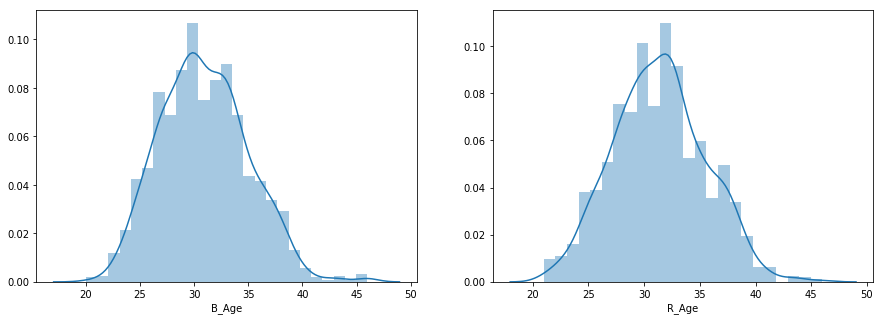

In [22]:
#fig, ax = plt.subplots(1,2, figsize=(12, 20))
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(df.B_Age, ax=ax[0])
sns.distplot(df.R_Age, ax=ax[1])

A idade é um grande fator em qualquer esporte, principalmente no MMA, onde você deve ter combinação de força, agilidade e velocidade (entre outras habilidades). Essas habilidades chegam a 27-35 e as lutas dos lutadores nessa idade devem ter maior probabilidade de vencer a luta. Vamos validar agrupando a idade para os lutadores azuis que venceram a luta.

In [23]:
BAge = df.groupby(['B_Age']).count()['winner']
BlueAge = BAge.sort_values(axis=0, ascending=False)
BlueAge.head(10)

B_Age
30.0    164
33.0    138
29.0    134
32.0    128
27.0    120
31.0    112
28.0    106
34.0    106
26.0     72
35.0     67
Name: winner, dtype: int64

Claramente, a maioria das lutas foi vencida por lutadores entre 20 e 30 anos de idade, com um pico durante esse período, perdendo força, rapidez e capacidade cardiovascular.

Por outro lado, lutadores mais jovens não desenvolvem força de pico até 27-28 ~ enquanto lutadores mais velhos são geralmente mais lentos e mais propensos a perder. Vamos verificar se isso é verdade em nossos dados. Desta vez vamos checar lutadores 'Vermelhos'.

In [24]:
RAge = df.groupby(['R_Age']).count()['winner']
RedAge = RAge.sort_values(axis=0, ascending=False)
RedAge.tail(10)

R_Age
24.000000    25
23.000000    17
40.000000    10
41.000000    10
22.000000    10
21.000000     5
43.000000     4
44.000000     3
46.000000     2
31.380081     1
Name: winner, dtype: int64


Parece que isso é verdade. Isso me deixa curioso sobre o número total de caças vermelhos e azuis com menos de 35 anos.

Text(0.5,1,'Age of Red fighters')

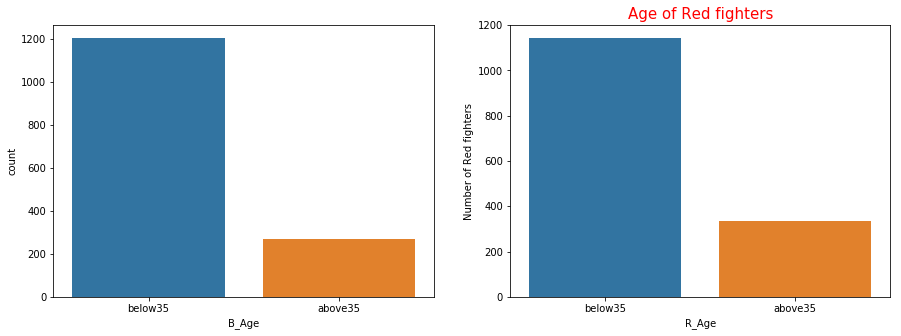

In [26]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
above35 =['above35' if i >= 35 else 'below35' for i in df.B_Age]
df_B = pd.DataFrame({'B_Age':above35})
sns.countplot(x=df_B.B_Age, ax=ax[0])
plt.ylabel('Number of fighters')
plt.title('Age of Blue fighters',color = 'Blue',fontsize=15)

above35 =['above35' if i >= 35 else 'below35' for i in df.R_Age]
df_R = pd.DataFrame({'R_Age':above35})
sns.countplot(x=df_R.R_Age, ax=ax[1])
plt.ylabel('Number of Red fighters')
plt.title('Age of Red fighters',color = 'Red',fontsize=15)


Curiosamente, a maioria dos lutadores está abaixo de 35. O MMA é um esporte brutal para os caras mais velhos e pode deixá-los com lesões ao longo da vida.

Por último, vamos olhar para a diferença média

In [27]:
df['Age_Difference'] = df.B_Age - df.R_Age
df[['Age_Difference', 'winner']].groupby('winner').mean()

,Age_Difference
winner,
blue,-1.459711
draw,-1.555556
no contest,0.058824
red,0.273304


A idade é importante e a juventude é uma clara vantagem.

A altura também é uma grande vantagem no MMA, já que significa mais altura e alcance, o que significa que o caça mais alto pode atacar à distância, mantendo-se a salvo da zona de impacto. Vamos começar olhando para a distribuição de altura:

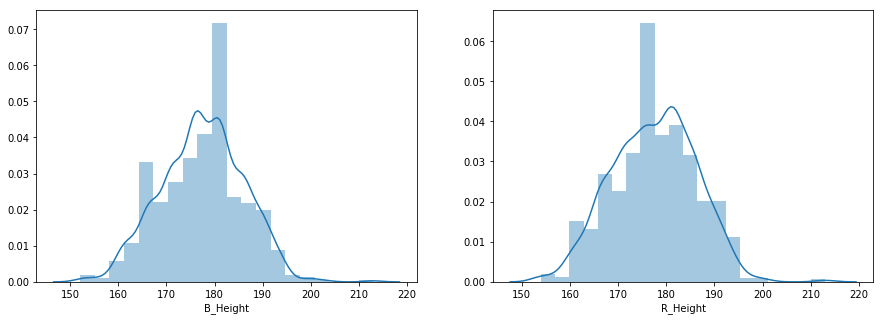

In [28]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(df.B_Height, bins = 20, ax=ax[0]) #Blue 
sns.distplot(df.R_Height, bins = 20, ax=ax[1]) #Red

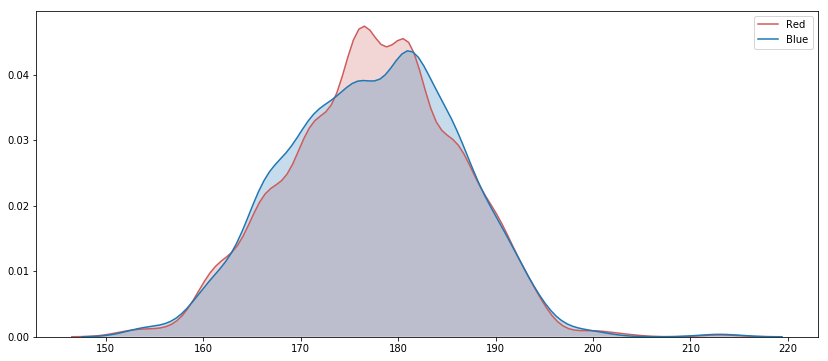

In [29]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(df.B_Height, shade=True, color='indianred', label='Red')
sns.kdeplot(df.R_Height, shade=True, label='Blue')

In [30]:
df['Height Difference'] = df.B_Height - df.R_Height
df[['Height Difference', 'winner']].groupby('winner').mean()

,Height Difference
winner,
blue,0.118151
draw,2.444444
no contest,-1.411765
red,-0.052536


O lutador mais alto tem uma vantagem e, em média, vence. Claro, a menos que você esteja lutando contra Drago;)

Agora, vamos falar sobre como os lutadores estão vencendo. As três formas mais populares de vencer em uma luta de MMA são:

1. DEC: Decisão (Dec) é um resultado da luta ou luta que não termina em um nocaute em que os scorecards dos juízes são consultados para determinar o vencedor; a maioria dos juízes deve concordar com um resultado. Uma luta pode terminar em uma vitória para um atleta, um empate ou uma decisão negativa.

2. SUB: também conhecido como "tap out" ou "tapping out" - é frequentemente realizado batendo visivelmente no chão ou no adversário com a mão ou em alguns casos com o pé, para sinalizar o adversário e / ou o árbitro. da submissão

3. KO / TKO: Knockout (KO) é quando um lutador é eliminado com frio. (ou seja, de uma posição em pé para não ficar em pé depois de receber um golpe). Knockout Técnico (TKO) é quando um lutador está sendo agredido e é incapaz de se defender mais. O árbitro intervirá e fará um julgamento para finalizá-lo e evitar que o lutador receba mais danos desnecessários ou permanentes e o chama de TKO.

In [35]:
temp = df["winby"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      #"name": "Types of Loans",
      #"hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"How the fighter's are winning?",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Win by",
                "x": 0.50,
                "y": 0.5
            }
            
        ]
    }
}
#iplot(fig, filename='donut')
print(fig)

{'data': [{'values': array([720, 458, 283], dtype=int64), 'labels': Index(['DEC', 'KO/TKO', 'SUB'], dtype='object'), 'domain': {'x': [0, 1]}, 'hole': 0.6, 'type': 'pie'}], 'layout': {'title': "How the fighter's are winning?", 'annotations': [{'font': {'size': 20}, 'showarrow': False, 'text': 'Win by', 'x': 0.5, 'y': 0.5}]}}



Então a maioria das lutas vai para os juízes. A segunda maneira mais popular é o Knockout e o KO Técnico.

Vamos verificar como isso é distribuído em relação a Age para os lutadores 'Red'.

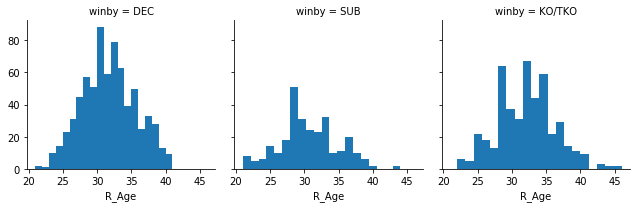

In [36]:
g = sns.FacetGrid(df, col='winby')
g.map(plt.hist, 'R_Age', bins=20)

O MMA é um esporte complexo, em certo sentido, é o único esporte em que a defesa e a ofensiva podem ser feitas no mesmo movimento. Bater em alguém é um risco, pois deixa você aberto para que seu oponente faça um contra-ataque. No entanto, quanto maior o risco, maior a recompensa. Mais tentativas ofensivas que você faz devem significar mais você chegar ao seu oponente (e com habilidades e poder certos - mais chances você tem de vencer a luta).

Vamos ver se isso é verdade com nossos dados.

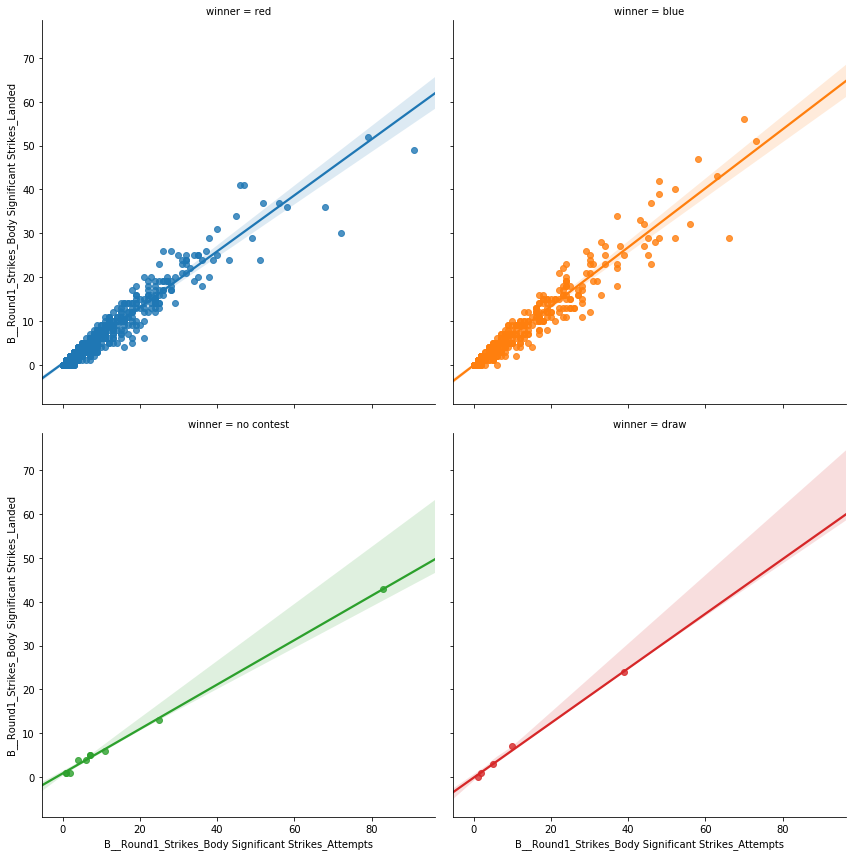

In [37]:
sns.lmplot(x="B__Round1_Strikes_Body Significant Strikes_Attempts", 
               y="B__Round1_Strikes_Body Significant Strikes_Landed", 
               col="winner", hue="winner", data=df, col_wrap=2, size=6)


Tentativas e greves desembarcadas são, como esperado, perfeitamente lineares.

Agora, vamos olhar para o local e descobrir os países mais populares

In [38]:
cnt_srs = df['R_Location'].value_counts().head(15)

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
    ),
)

layout = go.Layout(
    title='Most Popular cities for Red fighters'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename="Ratio")

NameError: name 'go' is not defined

In [41]:
cnt_srs = df['B_Location'].value_counts().head(15)

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
    ),
)

layout = go.Layout(
    title='Most Popular cities for Blue fighters'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename="Ratio")

NameError: name 'go' is not defined

O MMA parece ser mais proeminente no Brasil e nos EUA. De fato, o MMA é o segundo esporte mais popular depois do futebol no Brasil. Gostaria de saber se é devido ao antigo Jiu-Jitsu brasileiro?

Agora, vamos dar uma olhada nas reviravoltas Grappling, grappling standups e grappling takedowns em diferentes categorias de peso no Round 1

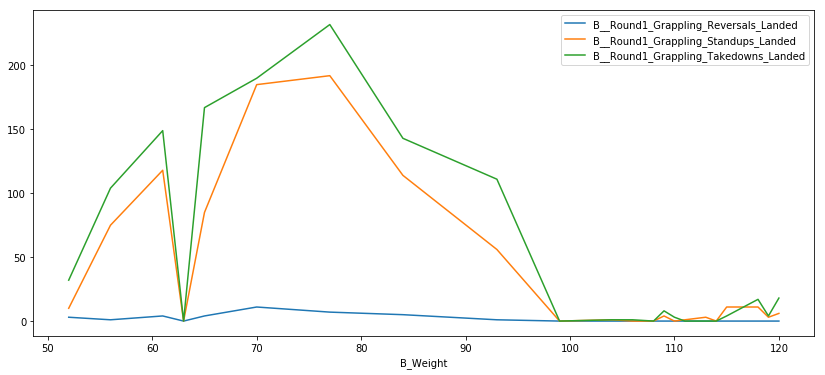

In [42]:
r1 = df[['B_Weight', 'B__Round1_Grappling_Reversals_Landed', 'B__Round1_Grappling_Standups_Landed', 
    'B__Round1_Grappling_Takedowns_Landed']].groupby('B_Weight').sum()

r1.plot(kind='line', figsize=(14,6))
plt.show()


Há pouquíssimas reversões de Grappling, mas grande quantidade de quedas de Grappling que foram desembarcadas. Mais especificamente, as classes de peso entre 70 e 80 preferem as quedas durante a primeira rodada.

Vamos comparar o mesmo para a 5ª rodada

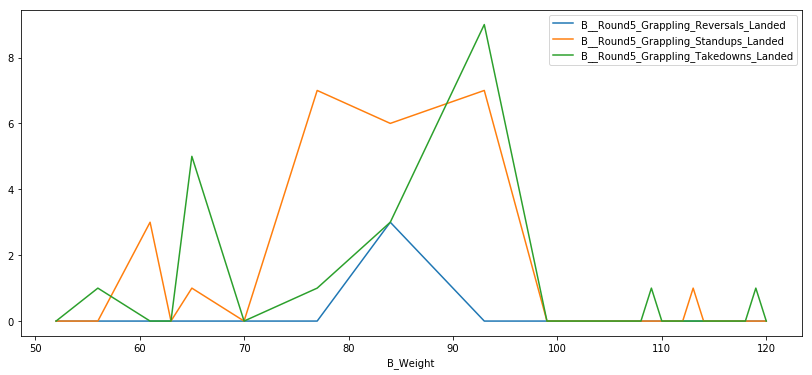

In [43]:
r5 = df[['B_Weight', 'B__Round5_Grappling_Reversals_Landed', 'B__Round5_Grappling_Standups_Landed', 'B__Round5_Grappling_Takedowns_Landed']].groupby('B_Weight').sum()

r5.plot(kind='line', figsize=(14,6))
plt.show()

Curiosamente, as reversões de grappling aumentam para os lutadores entre 80-90, enquanto as quedas diminuíram nos grupos mais leves.

Vamos olhar dados semelhantes para ataques de cabeça do Clinch, greves de perna do Clinch e greves do corpo para o Round 1

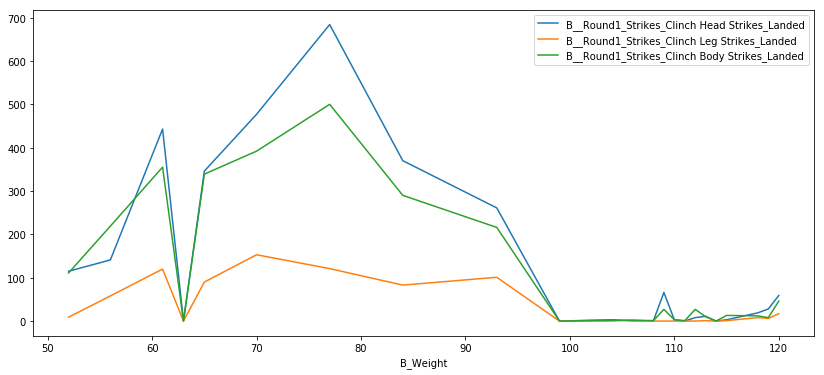

In [44]:
clin_r1 = df[['B_Weight', 'B__Round1_Strikes_Clinch Head Strikes_Landed', 'B__Round1_Strikes_Clinch Leg Strikes_Landed', 'B__Round1_Strikes_Clinch Body Strikes_Landed']].groupby('B_Weight').sum()

clin_r1.plot(kind='line', figsize=(14,6))
plt.show()


Os lutadores preferem acertar mais golpes na primeira rodada, vamos comparar isso com o que acontece na Rodada 5:

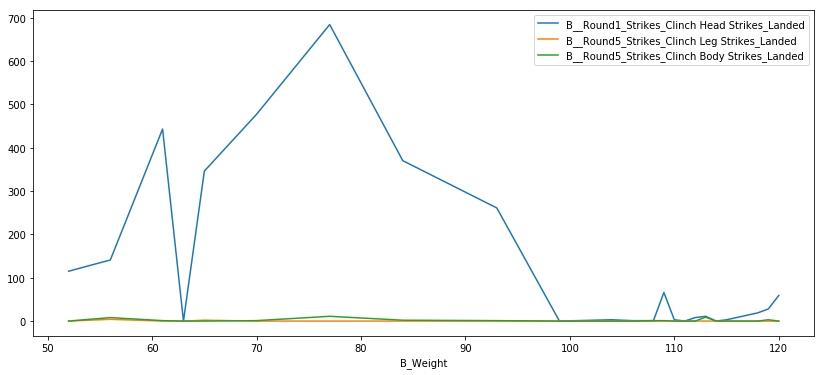

In [45]:
clin_r5= df[['B_Weight', 'B__Round1_Strikes_Clinch Head Strikes_Landed', 'B__Round5_Strikes_Clinch Leg Strikes_Landed', 'B__Round5_Strikes_Clinch Body Strikes_Landed']].groupby('B_Weight').sum()

clin_r5.plot(kind='line', figsize=(14,6))
plt.show()


Por volta da 5ª rodada, os lutadores (que estão agora desgastados) não estão conseguindo nenhum ataque de perna e corpo. Eles ainda estão pousando boa quantidade de golpes de cabeça. Isso faz sentido à medida que a luta está chegando ao fim e, em vez de depender dos juízes, eles querem fazer um Knock out.

Obrigado!